# PROJET : TATOUAGE DU SON

In [242]:
#Importation de nos bibliothèques

import numpy as np
import scipy.signal as signal
from scipy.signal import butter, lfilter, freqz
from scipy.signal import butter,filtfilt
import wave
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from numpy.fft import fft
from scipy.fft import fft, fftfreq
from scipy import signal
from IPython.display import Audio
import scipy
from commpy.filters import rcosfilter
from ModulationPy import PSKModem, QAMModem
import scipy


# Traitement du signal

Signal Datatype: int16
Fréquence d'échantillonage : 48000 Hz
Durée de la musique: 260.3 secondes


Text(0.5, 0, 'Temps (s)')

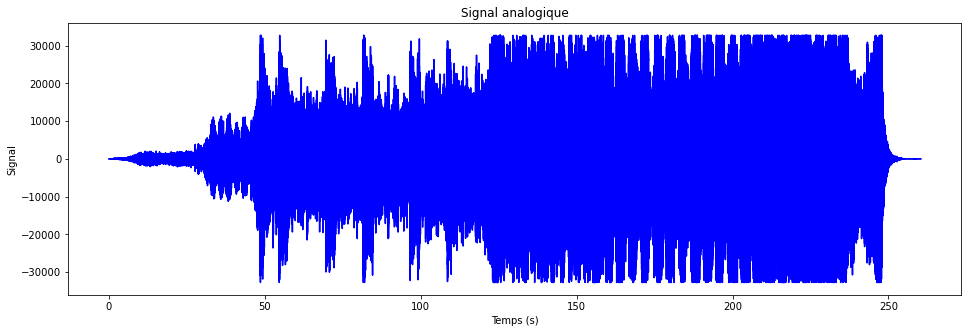

In [244]:
y ,sr = wavfile.read("interstellar.wav")

print('Signal Datatype:', sr.dtype)
print("Fréquence d'échantillonage : "+str(y) +" Hz")
durée = sr.shape[0] / y #durée du fichier audio en seconde = nb d'échantillon / fréquence 
print('Durée de la musique:', round(durée,1), 'secondes') 

temps = np.linspace(0, durée, sr.shape[0]) # <- Pour savoir quand est ce que chaque point est prélevé  

#On trace les valeurs du signal
plt.figure(figsize=(16, 5))
plt.plot(temps , sr ,color="blue")
plt.title("Signal analogique")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')


Signal Datatype: int16
Fréquence:  48000
Durée de la musique: 260.3 secondes


Text(0.5, 0, 'Temps (s)')

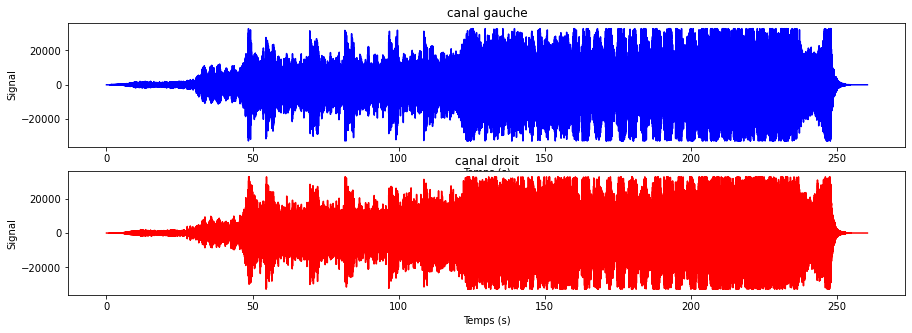

In [245]:
#En séparant les deux canaux
y2 ,sr2 = wavfile.read("interstellar.wav")

print('Signal Datatype:', sr2.dtype)
print("Fréquence: ",y2)
durée = sr2.shape[0] / y2 #durée du fichier audio en seconde = nb d'échantillon / fréquence 
print('Durée de la musique:', round(durée,1), 'secondes') 

temps = np.linspace(0, durée, sr2.shape[0]) # <- Pour savoir quand est ce que chaque point est prélevé  

plt.figure(figsize=(15, 5))
plt.subplot(2,1,1)
plt.plot(temps , sr2[:,0] ,color="blue")
plt.title("canal gauche")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')

plt.subplot(2,1,2)
plt.plot(temps, sr2[:,1], color="red")
plt.title("canal droit")
plt.ylabel('Signal')
plt.xlabel('Temps (s)')


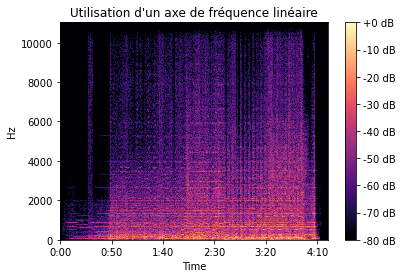

In [247]:
# la transformée de Fourier à court terme (STFT).
# Les STFT peuvent être utilisés comme moyen de quantifier le changement de la fréquence 
# et du contenu de phase d'un signal non stationnaire au fil du temps.
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title="Utilisation d'un axe de fréquence linéaire")
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [248]:
y, sr = librosa.load('interstellar.wav')

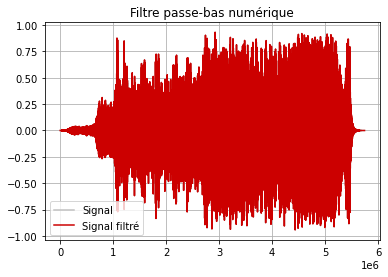

In [249]:
from scipy.signal import butter, sosfilt, sosfreqz
# Fréquence d'échantillonnage
fe = 1 # Hz
# Fréquence de nyquist
f_nyq = fe / 2.  # Hz
# Fréquence de coupure
fc = 0.4999  # Hz
# Préparation du filtre de Butterworth en passe-bas
b, a = signal.butter(4, fc/f_nyq, 'low', analog=False)

# Application du filtre
s_but = signal.filtfilt(b, a, y)

# Affichage du signal filtré
plt.plot(y, color='silver', label='Signal')
plt.plot(s_but, color='#cc0000', label='Signal filtré')
plt.grid(True, which='both')
plt.legend(loc="best")
plt.title("Filtre passe-bas numérique")
plt.show()

C:\Users\amaim\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


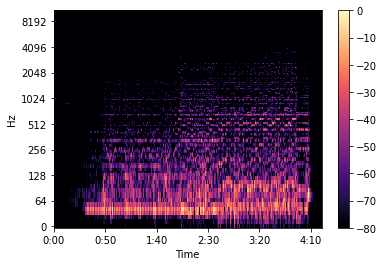

In [250]:
D = librosa.stft(s_but)

log_power = librosa.amplitude_to_db(D**2, ref = np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();

# EMMETEUR

# 1. Modulation QAM

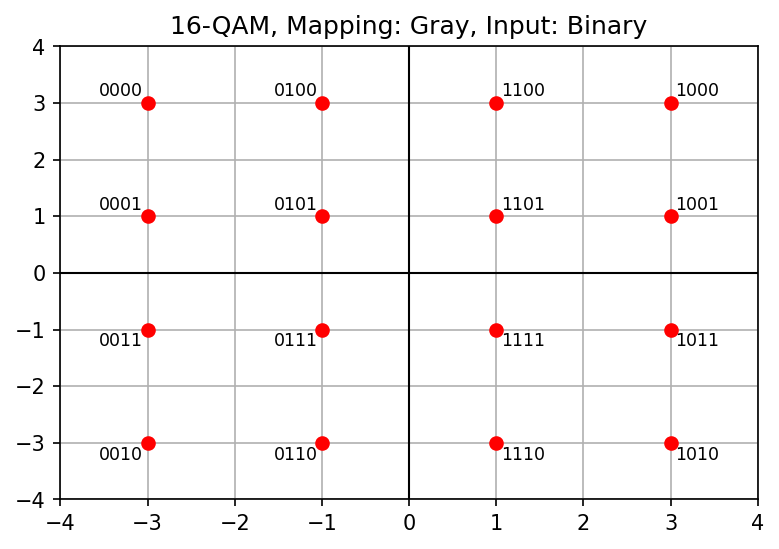

In [254]:
modem = QAMModem(16, 
                 bin_input=True,
                 soft_decision=False,
                 bin_output=True)
modem.plot_const()

In [266]:
def binaire(s):
    ords = (ord(c) for c in s)
    shifts = (7, 6, 5, 4, 3, 2, 1, 0)
    return [(o >> shift) & 1 for o in ords for shift in shifts]

def char(bits):
    chars = []
    for b in range(int(len(bits) / 8)):
        byte = bits[b*8:(b+1)*8]
        chars.append(chr(int(''.join([str(bit) for bit in byte]), 2)))
    return ''.join(chars)

texte = "L'objectif de ce projet est de créer un système de communication permettant de transmettre de l'information, en l'occurrence une image via la diffusion d'une musique. Afin de parvenir à cet objectif, nous allons utiliser la technique du tatouage du son pour dissimuler les données de notre image dans les hautes fréquences, qui sont inaudibles à l'oreille humaine. Ensuite, à l'aide d’un micro les capter, et après analyse retrouver l'image transmise. Pour ce faire nous disposons de 2 cartes Raspberry pi, un micro et des enceintes."
texte_bin = binaire(texte) #Texte convertit en binaire
texte_binaire = np.array(texte_bin)#Permet de convertir list en array

image = np.array([1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0]) # message d'entrée

msg = np.concatenate((image,texte_binaire)) #msg = image + texte que l'on souhaite transmettre 

print(msg[160:170])
print(texte_binaire[0:10])
print(len(texte))
print(msg.shape)
print(image.shape)
print(texte_binaire.shape)

[0 1 0 0 1 1 0 0 0 0]
[0 1 0 0 1 1 0 0 0 0]
533
(4424,)
(160,)
(4264,)


In [267]:
texte_char = char(texte_binaire) #Convertit du binaire au texte -> Vérification de la conversion en binaire
print(texte_char)

L'objectif de ce projet est de créer un système de communication permettant de transmettre de l'information, en l'occurrence une image via la diffusion d'une musique. Afin de parvenir à cet objectif, nous allons utiliser la technique du tatouage du son pour dissimuler les données de notre image dans les hautes fréquences, qui sont inaudibles à l'oreille humaine. Ensuite, à l'aide dun micro les capter, et après analyse retrouver l'image transmise. Pour ce faire nous disposons de 2 cartes Raspberry pi, un micro et des enceintes.


In [257]:
modulation = modem.modulate(msg) # modulation -> Moduler un tableau de bits en symboles de constellation
print ( " Message modulé : \n " + str (modulation)+ "\n")

demodulation = modem.demodulate(modulation) #démodulation
print ( " Message démodulé : \n " + str (demodulation))

 Message modulé : 
 [ 1.-1.j  3.+1.j  1.-1.j ... -3.-1.j -3.-3.j  1.-3.j]

 Message démodulé : 
 [1. 1. 1. ... 1. 1. 0.]


In [258]:
print(demodulation.shape)
print(msg.shape)
print(modulation.shape)

(4424,)
(4424,)
(1106,)


In [259]:
#ici on veut s'assurer qu'il n'y a pas eu d'erreur dans la modulation et la démodulation
np.array_equal(msg, demodulation)#On regarde si le message de base est égal à ce qu'on a obtenu apres la demodulation

True

# 2. Convolution

In [260]:
#Etape 2 : convolution
import scipy
from commpy.filters import rcosfilter

Tsymbol = 0.000187
Fsamp = 48000
alpha = 1/2
N = int(5*Tsymbol*Fsamp)
delta_symbols = np.zeros(len(modulation)*int(Tsymbol*Fsamp),dtype =complex)
delta_symbols[::int(Tsymbol*Fsamp)]= modulation

temps, h_rc = rcosfilter(N, alpha, Tsymbol, Fsamp)


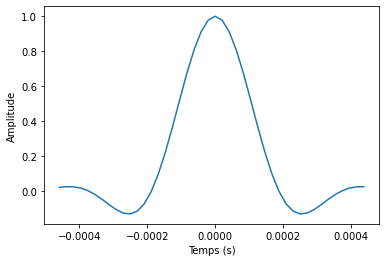

In [261]:
plt.plot(temps, h_rc)
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')

plt.show()

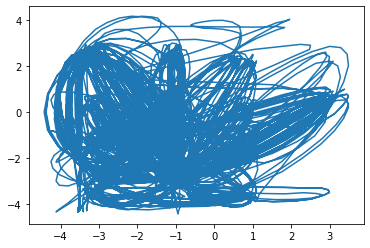

In [269]:
convo = np.convolve(delta_symbols , h_rc, mode="same") 
plt.figure()
plt.plot(np.real(convo), np.imag(convo))

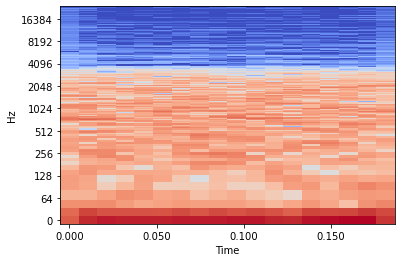

In [271]:
cnv = librosa.stft(np.real(convo))
cnv2=librosa.amplitude_to_db(abs(cnv))
plt.figure()
librosa.display.specshow(cnv2, sr= Fsamp , x_axis='time' , y_axis='log')

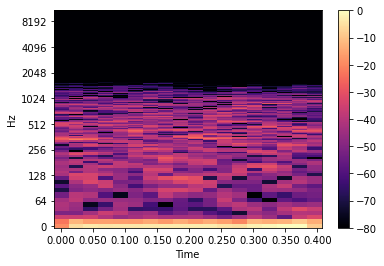

In [274]:
D = librosa.stft(np.real(convo))

log_power = librosa.amplitude_to_db(D**2, ref = np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();

In [263]:
Fcoupure = 16000 #Fréquence de coupure = milieu de la bande passante

t=np.linspace(0 , np.size(convo)/Fsamp , np.size(convo))
son = np.real(convo*np.exp(2*np.pi*1j*Fcoupure*t))
print(np.size(convo))
print(Fsamp)
Audio (son,rate =sr)

8848
48000


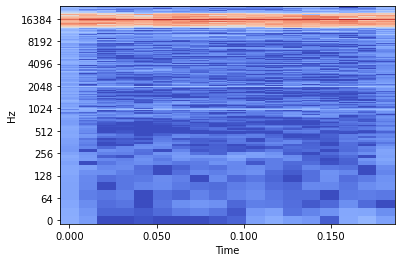

In [264]:
sonf = librosa.stft(son)
sonff=librosa.amplitude_to_db(abs(sonf))
plt.figure()
librosa.display.specshow(sonff, sr= Fsamp , x_axis='time' , y_axis='log')


C:\Users\amaim\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


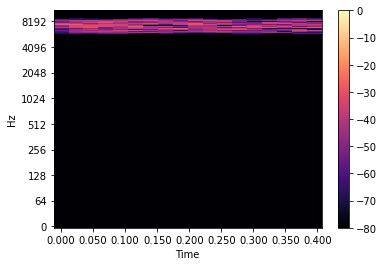

In [265]:
D = librosa.stft(son)

log_power = librosa.amplitude_to_db(D**2, ref = np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar();